# Study of COVID-19 in INDIA
Run all the cells once daily to update covid.csv

### Importing modules

In [1]:
## Run this section

import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Importing from Ministry of Health

In [2]:
## Start running

latest = pd.read_html("https://www.mohfw.gov.in/")[7]
latest = latest.drop(['S. No.'], axis=1)
latest

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Death
0,Andaman and Nicobar Islands,1,0,0,0
1,Andhra Pradesh,11,0,1,0
2,Bihar,6,0,0,1
3,Chandigarh,7,0,0,0
4,Chhattisgarh,6,0,0,0
5,Delhi,35,1,6,1
6,Goa,3,0,0,0
7,Gujarat,42,1,0,3
8,Haryana,16,14,11,0
9,Himachal Pradesh,3,0,0,1


In [3]:
latest.columns = ['State/UnionTerritory', 'Indian','Foreigner', 'Cured', 'Deaths']

In [4]:
latest['Date'] = str(datetime.date.today())

In [5]:
latest = latest[:-2]

In [6]:
latest

,State/UnionTerritory,Indian,Foreigner,Cured,Deaths,Date
0,Andaman and Nicobar Islands,1,0,0,0,2020-03-26
1,Andhra Pradesh,11,0,1,0,2020-03-26
2,Bihar,6,0,0,1,2020-03-26
3,Chandigarh,7,0,0,0,2020-03-26
4,Chhattisgarh,6,0,0,0,2020-03-26
5,Delhi,35,1,6,1,2020-03-26
6,Goa,3,0,0,0,2020-03-26
7,Gujarat,42,1,0,3,2020-03-26
8,Haryana,16,14,11,0,2020-03-26
9,Himachal Pradesh,3,0,0,1,2020-03-26


### Merging latest data and previous data

In [7]:
old_covid = pd.read_csv("covid.csv")

In [8]:
## Deleting today's record to avoid overwriting
old_covid = old_covid[old_covid['Date'] != str(datetime.date.today())]

In [9]:
## Merge
covid = pd.concat([old_covid, latest], ignore_index=True)

## Updating covid database
covid.to_csv("covid.csv", index=False)

## Work with updated covid DF.

C:\Users\Subham\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [10]:
# Converting to datetime
covid['Date'] = pd.to_datetime(covid['Date'])

### Formatting Beds

Call **beds.csv** as *beds* 

In [11]:
## Start running
beds = pd.read_csv('beds.csv')
beds.head()

,State/UnionTerritory,PrimaryHealthCenters,CommunityHealthCenters,SubDistrictHospitals,DistrictHospitals,TotalPublicHealthFacilities,NumPublicBeds,RuralHospitals,NumRuralBeds,UrbanHospitals,NumUrbanBeds
0,Andaman & Nicobar Islands,27,4,0,3,34,1246,27,575,3,500
1,Andhra Pradesh,1417,198,31,20,1666,60799,193,6480,65,16658
2,Arunachal Pradesh,122,62,0,15,199,2320,208,2136,10,268
3,Assam,1007,166,14,33,1220,19115,1176,10944,50,6198
4,Bihar,2007,63,33,43,2146,17796,930,6083,103,5936


### Census Formatting

Call **census.csv** as census

In [12]:
# Run this
census = pd.read_csv("census.csv")
census.head()

,State/UnionTerritory,Population,Rural,Urban,Area-sqkm,Density-/sqkm,SexRatio
0,Uttar Pradesh,199812341,155317278,44495063,240928,828.0,912
1,Maharashtra,112374333,61556074,50818259,307713,365.0,929
2,Bihar,104099452,92341436,11758016,94163,1102.0,918
3,West Bengal,91276115,62183113,29093002,88752,1029.0,953
4,Madhya Pradesh,72626809,52557404,20069405,308245,236.0,931


=====================================================================================

## Study of COVID 19 IN

In [13]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 6 columns):
Cured                   392 non-null object
Date                    392 non-null datetime64[ns]
Deaths                  392 non-null object
Foreigner               392 non-null object
Indian                  392 non-null object
State/UnionTerritory    392 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 18.5+ KB


In [14]:
import re
def intconvert(x):
    '''
    Integer & Special charecter remover
    '''
    return int(re.findall(r'\d+',x)[0])

In [15]:
covid['Foreigner'] = covid['Foreigner'].apply(int)
covid['Indian'] = covid['Indian'].apply(int)
#implementing lambda
covid['Deaths'] = covid['Deaths'].apply(int)
covid['Cured'] = covid['Cured'].apply(int)

In [16]:
covid['Total Active'] = covid['Foreigner'] + covid['Indian'] - covid['Cured'] - covid['Deaths']
covid['Total'] = covid['Foreigner'] + covid['Indian'] 

In [17]:
india = covid.groupby('Date').sum()
india

,Cured,Deaths,Foreigner,Indian,Total Active,Total
Date,,,,,,
2020-01-30,0,0,0,1,1,1
2020-01-31,0,0,0,1,1,1
2020-02-01,0,0,0,2,2,2
2020-02-02,0,0,0,3,3,3
2020-02-03,0,0,0,3,3,3
2020-02-04,0,0,0,3,3,3
2020-02-05,0,0,0,3,3,3
2020-02-06,0,0,0,3,3,3
2020-02-07,0,0,0,3,3,3


In [18]:

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


import cufflinks as cf

init_notebook_mode(connected=True)
cf.go_offline()

# import chart_studio.plotly as py
# import plotly.graph_objects as go

C:\Users\Subham\Anaconda3\lib\site-packages\dask\config.py:131: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



In [19]:
from plotly import __version__
print(__version__)

3.10.0


### EDA India

In [20]:
india[['Total','Indian','Foreigner']].iplot(
    title='CUMULATIVE COUNT',
    colors={'Total':'black','Indian':'orange',
            'Foreigner':'blue'}, width=2.5,
    xTitle='30th Jan 2020 -> today', yTitle='Confirmed cases')

In [21]:
india[['Total Active','Cured','Deaths']].iplot(title='[ACTIVE CASES]\nHOSPITALIZED vs CURED vs DEATH',
                                      colors={'Total Active':'blue','Cured':'green','Deaths':'red'}, width=2.5
                                              ,xTitle='30th Jan 2020 -> today', yTitle='Confirmed cases')

**80% of the affected people will be safe** if heathcare system doesn't breakdown

In [22]:
india['Safe-Zone'] = india['Total']*0.8

In [23]:
india[['Total','Safe-Zone']].iplot(title='CUMULATIVE COUNT',
                    colors={'Total':'black', 'Safe-Zone':'blue'}, width=2.5
                    ,xTitle='30th Jan 2020 -> today', yTitle='Confirmed cases')

In [24]:
init = 0
ls = []
for x in india['Total']:
    ls.append(x-init)
    init=x
print(ls)
india['Rise'] = ls

[1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 22, 2, 1, 3, 5, 7, 12, 2, 14, 7, 3, 26, 4, 23, 14, 22, 50, 60, 77, 73, 86, 87, 88]


In [25]:
india['Rise'].iplot(kind='bar', sharing='public', title='DAILY RISE IN CASES', colors={'Rise':'indigo'}, width=2.5
                    ,xTitle='30th Jan 2020 -> today', yTitle='Confirmed cases')

#### Statewise statistics

In [26]:
states = latest.copy()
states.drop(['Date'], axis=1, inplace=True)
states['Foreigner']=states['Foreigner'].apply(int)
states['Deaths']=states['Deaths'].apply(int)
states['Cured']=states['Cured'].apply(int)
states['Indian']=states['Indian'].apply(int)
states['Total'] = states['Foreigner']+states['Indian']
states.set_index('State/UnionTerritory', inplace=True)
states

,Indian,Foreigner,Cured,Deaths,Total
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,1,0,0,0,1
Andhra Pradesh,11,0,1,0,11
Bihar,6,0,0,1,6
Chandigarh,7,0,0,0,7
Chhattisgarh,6,0,0,0,6
Delhi,35,1,6,1,36
Goa,3,0,0,0,3
Gujarat,42,1,0,3,43
Haryana,16,14,11,0,30


In [27]:
states.drop(['Indian','Foreigner'], axis=1).iplot(
    title='STATEWISE BREAKDOWN', kind='bar',orientation='h', 
    colors={'Total':'blue', 'Cured':'green', 'Deaths':'red'})

#### Working on map of India

In [28]:
# Because we're making some modifications according to geopandas
map_state = states.copy()
map_state.index

Index(['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Karnataka', 'Kerala',
       'Ladakh', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Mizoram',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Tamil Nadu',
       'Telengana', 'Uttarakhand', 'Uttar Pradesh', 'West Bengal'],
      dtype='object', name='State/UnionTerritory')

In [30]:
map_state.index = ['Andaman and Nicobar Islands','Andhra Pradesh', 'Bihar', 'Chhattisgarh', 'NCT of Delhi','Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra','Manipur','Mizoram', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Tamil Nadu', 'Telangana', 'Chandigarh', 'Jammu & Kashmir', 'Ladakh',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal']

In [31]:
## Merging Ladakh with J&K
map_state.loc['Jammu & Kashmir'] = map_state.loc['Jammu & Kashmir']+map_state.loc['Ladakh']

In [32]:
import geopandas as gpd
import descartes

In [33]:
fp = "Igismap/Indian_States.shp"  #Download this file available on the internet.
map_df = gpd.read_file(fp)

In [34]:
map_df=map_df.set_index('st_nm')
map_df.index # To tally the names

Index(['Andaman & Nicobar Island', 'Arunanchal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadara & Nagar Havelli', 'Daman & Diu',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'NCT of Delhi', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'Odisha', 'Andhra Pradesh'],
      dtype='object', name='st_nm')

In [35]:
merged = map_df.join(map_state) #with index as statename
merged['Total'].fillna(0, inplace=True)
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 36 entries, Andaman & Nicobar Island to Andhra Pradesh
Data columns (total 6 columns):
geometry     36 non-null geometry
Indian       25 non-null float64
Foreigner    25 non-null float64
Cured        25 non-null float64
Deaths       25 non-null float64
Total        36 non-null float64
dtypes: float64(5), geometry(1)
memory usage: 3.2+ KB


C:\Users\Subham\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning:

invalid value encountered in less

C:\Users\Subham\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning:

invalid value encountered in less



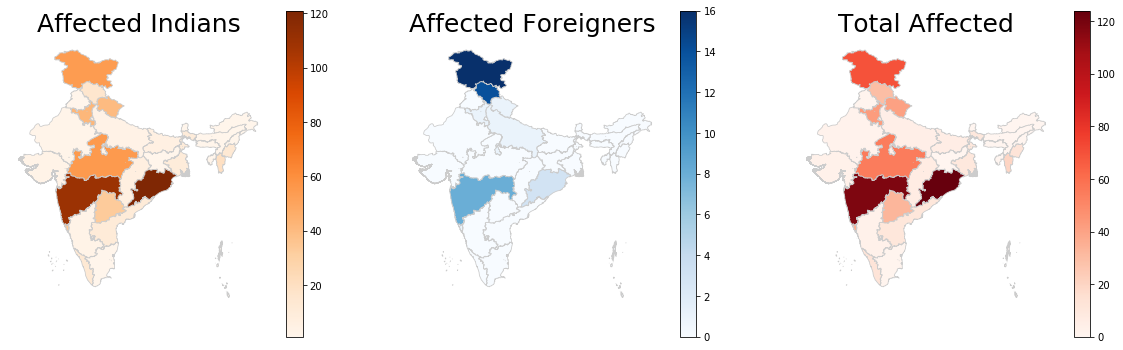

In [36]:
fig, axes = plt.subplots(ncols=3, figsize=(20,6))
t=0
for ax in axes: 
    if t==0:
        ax.axis('off')
        ax.set_title('Affected Indians', fontdict={'fontsize': '25', 'fontweight' : '3'})

        merged.plot(column='Indian', cmap='Oranges', 
                    linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
        t=1
    elif t==1:
        ax.axis('off')
        ax.set_title('Affected Foreigners', fontdict={'fontsize': '25', 'fontweight' : '3'})

        merged.plot(column='Foreigner', cmap='Blues', 
                    linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
        t=2
    else:
        ax.axis('off')
        ax.set_title('Total Affected', fontdict={'fontsize': '25', 'fontweight' : '3'})

        merged.plot(column='Total', cmap='Reds', 
                    linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

In [37]:
fig.savefig("statewise_affected.png", dpi=1000)

C:\Users\Subham\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning:

invalid value encountered in less

C:\Users\Subham\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning:

invalid value encountered in less



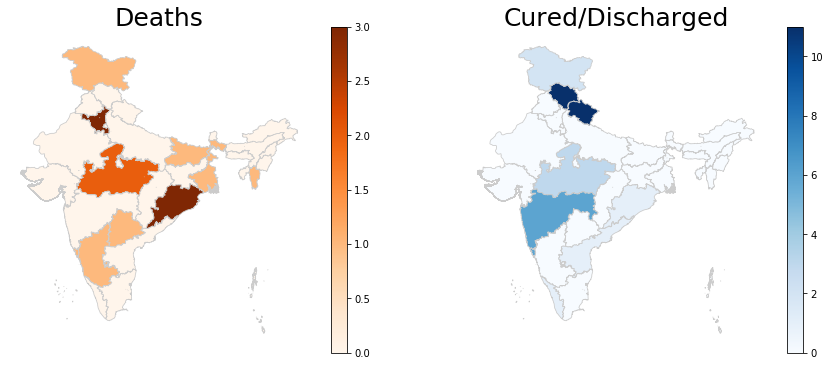

In [38]:
fig, axes = plt.subplots(ncols=2, figsize=(15,6))
t=0
for ax in axes: 
    if t==0:
        ax.axis('off')
        ax.set_title('Deaths', fontdict={'fontsize': '25', 'fontweight' : '3'})

        merged.plot(column='Deaths', cmap='Oranges', 
                    linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
        t=1
    elif t==1:
        ax.axis('off')
        ax.set_title('Cured/Discharged', fontdict={'fontsize': '25', 'fontweight' : '3'})

        merged.plot(column='Cured', cmap='Blues', 
                    linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

In [39]:
fig.savefig("death_cure.png", dpi=1000)

In [40]:
state_dic = {}
for state in states.index:
    state_dic[state] = covid[covid['State/UnionTerritory']==state].drop(['State/UnionTerritory'], axis=1).set_index('Date')

In [41]:
for state in state_dic:
    state_dic[state][['Total Active','Indian','Foreigner', 'Cured','Deaths']].iplot(title=state,
                    #colors={'Total':'black', 'Safe-Zone':'blue'}, width=2.5
                    xTitle='first case -> today', yTitle='Confirmed cases')

### Category 1 states

Maharastra, Kerala and Karnataka

In [42]:
state_dic['Maharashtra'][['Total Active', 'Cured','Deaths']].iplot(title='Maharashtra',
                    #colors={'Total':'black', 'Safe-Zone':'blue'}, width=2.5
                    xTitle='first case -> today', yTitle='Confirmed cases')

In [43]:
state_dic['Kerala'][['Total Active', 'Cured','Deaths']].iplot(title='Kerala',
                    #colors={'Total':'black', 'Safe-Zone':'blue'}, width=2.5
                    xTitle='first case -> today', yTitle='Confirmed cases')

### Kerala vs MH vs rest of India

In [44]:
kmh = covid[(covid['State/UnionTerritory'] == 'Kerala') | (covid['State/UnionTerritory'] == 'Maharashtra')]
rest = covid[(covid['State/UnionTerritory'] != 'Kerala') & (covid['State/UnionTerritory'] != 'Maharashtra')].groupby('Date').sum()
rest['State/UnionTerritory'] = 'Other States'
rest_india = pd.concat([kmh.set_index('Date'),rest])
rest_india = rest_india.sort_index()
rest_india.head()

C:\Users\Subham\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,Cured,Deaths,Foreigner,Indian,State/UnionTerritory,Total,Total Active
Date,,,,,,,
2020-01-30,0,0,0,1,Kerala,1,1
2020-01-31,0,0,0,1,Kerala,1,1
2020-02-01,0,0,0,2,Kerala,2,2
2020-02-02,0,0,0,3,Kerala,3,3
2020-02-03,0,0,0,3,Kerala,3,3


C:\Users\Subham\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



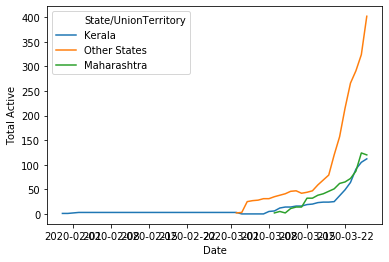

In [45]:
## Plot this with plotly
sns.lineplot(data=rest_india, x=rest_india.index, y='Total Active', hue='State/UnionTerritory')

### Kerala+MH vs Rest

In [46]:
km = kmh.groupby('Date').sum()
km['State/UnionTerritory'] = 'Kerala + Maharashtra'
rest_km = pd.concat([km,rest])
rest_km = rest_km.sort_index()
rest_km.head()

,Cured,Deaths,Foreigner,Indian,Total Active,Total,State/UnionTerritory
Date,,,,,,,
2020-01-30,0,0,0,1,1,1,Kerala + Maharashtra
2020-01-31,0,0,0,1,1,1,Kerala + Maharashtra
2020-02-01,0,0,0,2,2,2,Kerala + Maharashtra
2020-02-02,0,0,0,3,3,3,Kerala + Maharashtra
2020-02-03,0,0,0,3,3,3,Kerala + Maharashtra


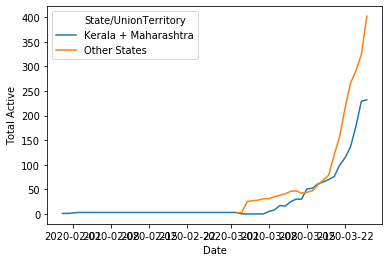

In [47]:
sns.lineplot(data=rest_km, x=rest_km.index, y='Total Active', hue='State/UnionTerritory')

### To predict death-cure rate for various states

In [48]:
# a-Time between first case to first cure.
# b-Time between the equal/greater no. of cases as compared to cures.
# d-First case to death

In [49]:
recovery = {}
for state in state_dic:
    
    start = state_dic[state].index[0]
    try:
        death = state_dic[state][state_dic[state]['Deaths']==1].index[0]
    except IndexError:
        death = start

    finally:
        death = (death-start).days

    try:
        cure_a = state_dic[state][state_dic[state]['Cured']>=1].index[0]
    except IndexError:
        cure_a = start

    finally:
        a = (cure_a-start).days

    try:
        cure_b = state_dic[state][state_dic[state]['Cured']>=3].index[0]
        st = state_dic[state][state_dic[state]['Total Active']>=3].index[0]
    except IndexError:
        cure_b = start
        st = start

    finally:
        b = (cure_b-st).days
    
    try:
        cure_c = state_dic[state][state_dic[state]['Cured']>=5].index[0]
        st = state_dic[state][state_dic[state]['Total Active']>=5].index[0]
    except IndexError:
        cure_c = start
        st = start

    finally:
        c = (cure_c-st).days
        
    try:
        cure_d = state_dic[state][state_dic[state]['Cured']>=7].index[0]
        st = state_dic[state][state_dic[state]['Total Active']>=7].index[0]
    except IndexError:
        cure_d = start
        st = start

    finally:
        d = (cure_d-st).days

    recovery[state] = [death,  a,b,c,d]

In [50]:
recov_df = pd.DataFrame(data=recovery, index=recovery,
             columns=['First death','First cure','Third cure','Fifth cure','Seventh cure'],)
for x in recovery:
    recov_df.loc[x] = recovery[x]
recov_df


,First death,First cure,Third cure,Fifth cure,Seventh cure
Andaman and Nicobar Islands,0,0,0,0,0
Andhra Pradesh,0,13,0,0,0
Bihar,0,0,0,0,0
Chandigarh,0,0,0,0,0
Chhattisgarh,0,0,0,0,0
Delhi,12,12,13,9,0
Goa,0,0,0,0,0
Gujarat,2,0,0,0,0
Haryana,0,20,13,13,13
Himachal Pradesh,3,0,0,0,0
